<a href="https://colab.research.google.com/github/BrendaGilisho/clusteringImages/blob/main/clusteringImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries
import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import keras
import cv2
%matplotlib inline
#import K-Means
from sklearn.cluster import KMeans
# important metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
path = "/content/drive/My Drive/House_Room_Dataset"
# datasets = path + "/datasets/train"

In [ ]:

images = []
imageNames = []

with os.scandir(path) as files:
  for file in files:
    with os.scandir(file) as rooms:
      print(file.name)
      for imgs in rooms:
        print(imgs)
        if imgs.name.endswith('.jpg'):
              file_path = path + "/" + file.name + "/" + imgs.name
              print(file_path)
              imageNames.append(file_path)
              
              img=cv2.imread(file_path)

              try:
                img=cv2.resize(img,(32,32))
                img=img.astype(np.float32)
              except:
                break

              images.append(img)

print(images)
data = np.array(images)
data.sum()
  

Streaming output truncated to the last 5000 lines.
<DirEntry 'living_1237.jpg'>
/content/drive/My Drive/House_Room_Dataset/Livingroom/living_1237.jpg
<DirEntry 'living_456.jpg'>
/content/drive/My Drive/House_Room_Dataset/Livingroom/living_456.jpg
<DirEntry 'living_1197.jpg'>
/content/drive/My Drive/House_Room_Dataset/Livingroom/living_1197.jpg
<DirEntry 'living_1044.jpg'>
/content/drive/My Drive/House_Room_Dataset/Livingroom/living_1044.jpg
<DirEntry 'living_731.jpg'>
/content/drive/My Drive/House_Room_Dataset/Livingroom/living_731.jpg
<DirEntry 'living_1284.jpg'>
/content/drive/My Drive/House_Room_Dataset/Livingroom/living_1284.jpg
<DirEntry 'living_196.jpg'>
/content/drive/My Drive/House_Room_Dataset/Livingroom/living_196.jpg
<DirEntry 'living_1257.jpg'>
/content/drive/My Drive/House_Room_Dataset/Livingroom/living_1257.jpg
<DirEntry 'living_462.jpg'>
/content/drive/My Drive/House_Room_Dataset/Livingroom/living_462.jpg
<DirEntry 'living_1040.jpg'>
/content/drive/My Drive/House_Room_Da

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



8111491.5

In [ ]:
# Normalize data by dividing every element by 255.0
data = data/255.0

# Reshape data array to a 2D array with a single column and as many rows as there are elements in the original data array
reshaped_data = data.reshape(len(data),-1)

In [ ]:
data[0]

array([[[0.00219915, 0.00256824, 0.00266052],
        [0.00227605, 0.00264514, 0.00273741],
        [0.00226067, 0.00262976, 0.00272203],
        ...,
        [0.00207612, 0.00250673, 0.00267589],
        [0.00202999, 0.00246059, 0.00262976],
        [0.00201461, 0.00244521, 0.00261438]],

       [[0.00199923, 0.00242983, 0.002599  ],
        [0.00204537, 0.00247597, 0.00264514],
        [0.00210688, 0.00253749, 0.00270665],
        ...,
        [0.00201461, 0.00244521, 0.00261438],
        [0.00199923, 0.00242983, 0.002599  ],
        [0.00193772, 0.00236832, 0.00253749]],

       [[0.00201461, 0.00244521, 0.00261438],
        [0.00201461, 0.00246059, 0.002599  ],
        [0.00210688, 0.00255286, 0.00266052],
        ...,
        [0.00235294, 0.00278354, 0.0028912 ],
        [0.00233756, 0.00275279, 0.00290657],
        [0.0020915 , 0.00249135, 0.00267589]],

       ...,

       [[0.00224529, 0.00255286, 0.00262976],
        [0.00215302, 0.00247597, 0.00250673],
        [0.00224529, 0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Convert the images and labels to numpy arrays
images = np.array(reshaped_data)
labels = np.array(imageNames)

# Split the data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [ ]:
# X_train = reshaped_data
X_train = train_images

In [ ]:
kmeans = KMeans(n_clusters=14, random_state=22)
clusters = kmeans.fit(X_train)

In [ ]:
# Fit the best model on the entire training data
clusters.fit(X_train)

KMeans(n_clusters=14, random_state=22)

In [ ]:
with open(path + "/best_model.pkl", "wb") as f:
    pickle.dump(clusters, f)

In [ ]:
clusters.labels_

array([ 2, 13,  0, ...,  6,  6,  9], dtype=int32)

In [ ]:
groups = {}
for file, cluster in zip(imageNames, clusters.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img 

In [ ]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to +30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 353 to +30


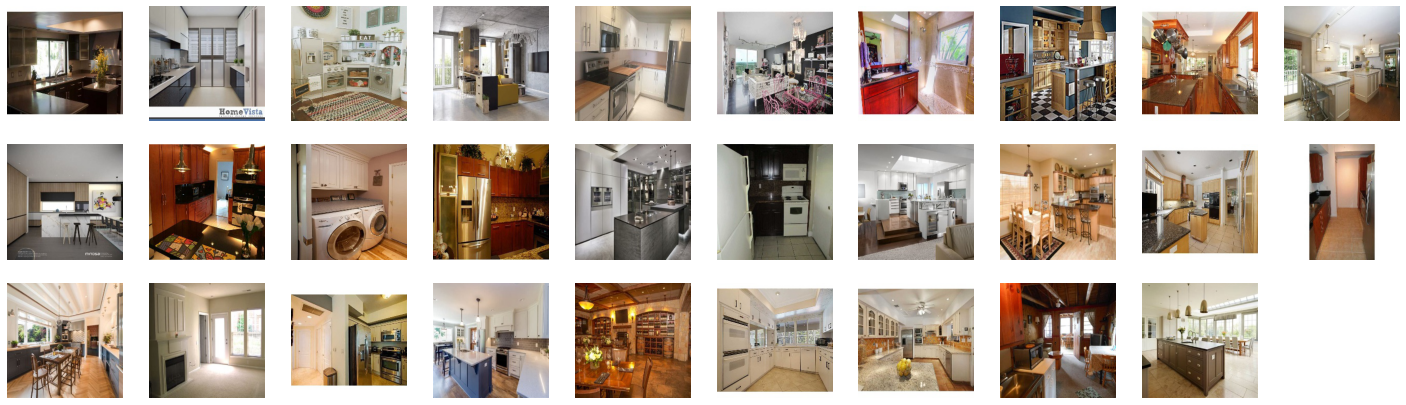

In [ ]:
view_cluster(0)

Clipping cluster size from 380 to 30


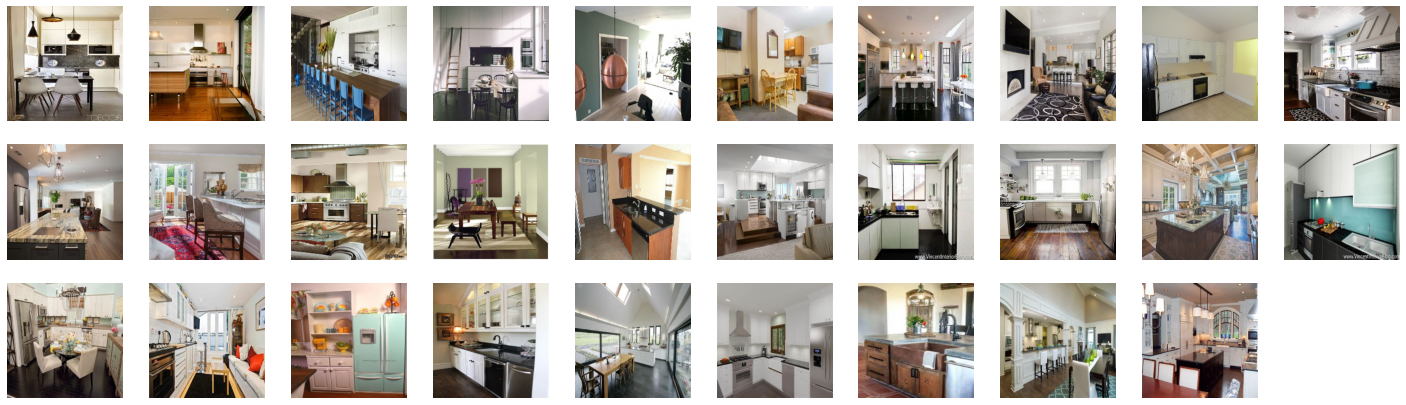

In [ ]:
v view_cluster(1)

Clipping cluster size from 108 to 30


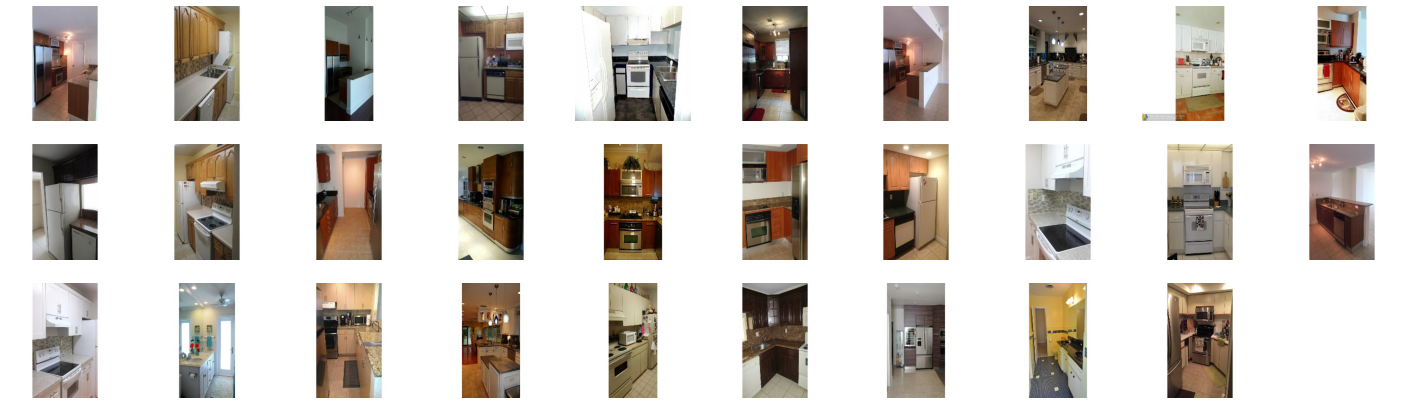

In [ ]:
view_cluster(6)

Clipping cluster size from 377 to 30


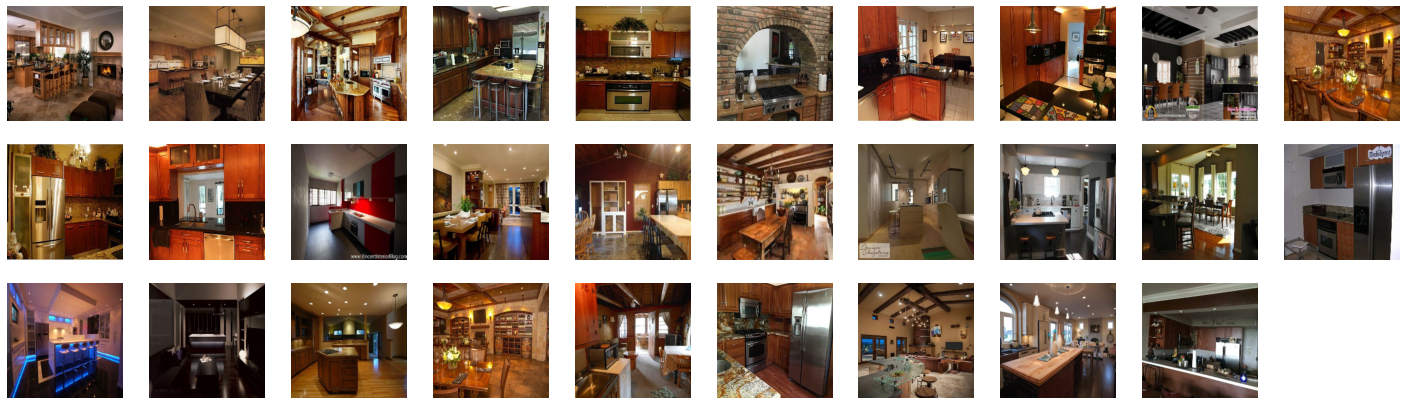

In [ ]:
view_cluster(13)